In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_combined_dataset.csv')

In [3]:
xfeatures=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x','G1.x','G3.x']

In [4]:
yfeatures = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet','guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y','G1.y','G3.y']

In [5]:
keepcol = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y']

In [6]:
fildf = df.loc[:,keepcol]

In [7]:
fildf_x = fildf.loc[:,xfeatures]

In [8]:
fildf_y = fildf.loc[:,yfeatures]

In [9]:
def convertmarks(mark):
    if mark<10:
        return 'F'
    elif mark==10 or mark==11:
        return 'D'
    elif mark==12 or mark==13:
        return 'C'
    elif mark==14 or mark==15:
        return'B'
    else:
        return 'A'

In [10]:
newlist=[]
for i in fildf_x['G1.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G1'] = newlist

In [11]:
newlist=[]
for i in fildf_y['G1.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G1'] = newlist

In [12]:
newlist=[]
for i in fildf_x['G3.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G3'] = newlist

In [13]:
newlist=[]
for i in fildf_y['G3.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G3'] = newlist

In [14]:
label_encoder = preprocessing.LabelEncoder()

In [15]:
fildf_x['New G1']= label_encoder.fit_transform(fildf_x['New G1'])
fildf_y['New G1']= label_encoder.fit_transform(fildf_y['New G1'])
fildf_x['New G3']= label_encoder.fit_transform(fildf_x['New G3'])
fildf_y['New G3']= label_encoder.fit_transform(fildf_y['New G3'])

In [16]:
fildf_x = fildf_x.sample(frac=1,random_state=123)
fildf_y = fildf_y.sample(frac=1,random_state=123)

In [17]:
fildf_x = fildf_x.drop(['G1.x','G3.x'],axis=1)
fildf_y = fildf_y.drop(['G1.y','G3.y'],axis=1)

In [18]:
features_x_G3 = fildf_x.drop(['New G1','New G3'],axis=1)
features_x_G1 = fildf_x.drop(['New G1','New G3'],axis=1)
features_y_G3 = fildf_y.drop(['New G1','New G3'],axis=1)
features_y_G1 = fildf_y.drop(['New G1','New G3'],axis=1)

In [19]:
target_x_G3 = fildf_x['New G3']
target_x_G1 = fildf_x['New G1']
target_y_G3 = fildf_x['New G3']
target_y_G1 = fildf_x['New G1']

In [20]:
X_train_x_G1, X_test_x_G1, y_train_x_G1, y_test_x_G1 = train_test_split(features_x_G1, target_x_G1, test_size=0.25, random_state=0)
X_train_y_G1, X_test_y_G1, y_train_y_G1, y_test_y_G1 = train_test_split(features_y_G1, target_y_G1, test_size=0.25, random_state=0)

In [21]:
X_train_x_G3, X_test_x_G3, y_train_x_G3, y_test_x_G3 = train_test_split(features_x_G3, target_x_G3, test_size=0.25, random_state=0)
X_train_y_G3, X_test_y_G3, y_train_y_G3, y_test_y_G3 = train_test_split(features_y_G3, target_y_G3, test_size=0.25, random_state=0)

### Naive Bayes

In [22]:
clf = GaussianNB()

In [23]:
clf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= clf.predict(X_test_x_G1)
y_pred_x_G1_Prob = clf.predict_proba(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.90      0.07      0.13       126
           1       0.00      0.00      0.00         0
           2       0.19      0.61      0.29        33
           3       0.31      0.58      0.40        19
           4       0.52      0.70      0.59        43

    accuracy                           0.32       221
   macro avg       0.38      0.39      0.28       221
weighted avg       0.67      0.32      0.27       221

Kappa Score: 0.1861525704809287


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
clf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= clf.predict(X_test_x_G3)
y_pred_x_G3_Prob = clf.predict_proba(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.08      0.04      0.05        27
           1       0.80      0.12      0.21       102
           2       0.19      0.61      0.29        31
           3       0.10      0.33      0.15         6
           4       0.61      0.78      0.68        55

    accuracy                           0.35       221
   macro avg       0.35      0.38      0.27       221
weighted avg       0.56      0.35      0.31       221

Kappa Score: 0.20028144946474324


In [25]:
clf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = clf.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       1.00      0.05      0.10       182
           1       0.00      0.00      0.00         1
           2       0.02      0.67      0.04         3
           3       0.17      0.33      0.22        18
           4       0.10      0.35      0.16        17

    accuracy                           0.11       221
   macro avg       0.26      0.28      0.10       221
weighted avg       0.85      0.11      0.12       221

Kappa Score: 0.03388514113261132


In [26]:
clf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = clf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.08      0.14       132
           2       0.24      0.55      0.33        44
           3       0.14      0.15      0.15        20
           4       0.13      0.41      0.19        22

    accuracy                           0.21       221
   macro avg       0.23      0.24      0.16       221
weighted avg       0.47      0.21      0.18       221

Kappa Score: 0.04163052905464004


### Decision Tree Classfier

In [27]:
dtc = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.30      0.23      0.26        13
           1       0.07      0.06      0.06        18
           2       0.66      0.67      0.67       101
           3       0.28      0.30      0.29        33
           4       0.59      0.61      0.60        56

    accuracy                           0.52       221
   macro avg       0.38      0.37      0.38       221
weighted avg       0.52      0.52      0.52       221

Kappa Score: 0.30978584176085655
	
Feature failures.x and its importance is 0.16757219155687927
Feature schoolsup.x and its importance is 0.10844180882602196
Feature age and its importance is 0.05691639038998449
Feature absences.x and its importance is 0.0560114445649295
Feature freetime.x and its importance is 0.05064330924825134
Feature Fedu and its importance is 0.04852263338256638
Feature Fjob and its importance is 0.04407650752756982
Feature Medu and its importance is 0.044006174060437483
Feature reas

([<matplotlib.axis.XTick at 0x7fed033831d0>,
 <a list of 30 Text xticklabel objects>)

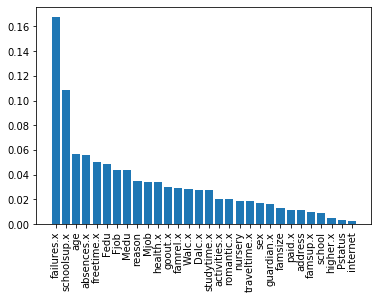

In [28]:
imp_dict={}
dtc.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= dtc.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.33      0.27      0.30        15
           1       0.07      0.06      0.06        17
           2       0.65      0.62      0.63       106
           3       0.29      0.22      0.25        27
           4       0.55      0.70      0.61        56

    accuracy                           0.52       221
   macro avg       0.38      0.37      0.37       221
weighted avg       0.51      0.52      0.52       221

Kappa Score: 0.29790324044658256
	
Feature failures.x and its importance is 0.14735740002062853
Feature schoolsup.x and its importance is 0.11448457080093033
Feature absences.x and its importance is 0.06563268864358668
Feature age and its importance is 0.06362859225918249
Feature Medu and its importance is 0.04679807156204901
Feature Fedu and its importance is 0.044613736827965635
Feature Dalc.x and its importance is 0.041381188442563936
Feature studytime.x and its importance is 0.0408778595575865
Feature 

([<matplotlib.axis.XTick at 0x7fed033ef910>,
 <a list of 30 Text xticklabel objects>)

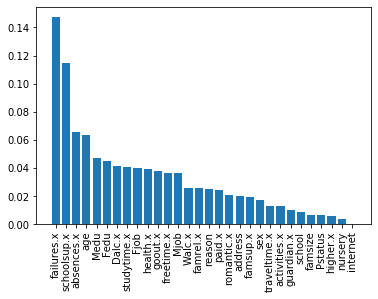

In [29]:
imp_dict={}
dtc.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= dtc.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.07      0.08      0.07        13
           2       0.41      0.46      0.43        92
           3       0.17      0.15      0.16        39
           4       0.29      0.27      0.28        64

    accuracy                           0.30       221
   macro avg       0.19      0.19      0.19       221
weighted avg       0.29      0.30      0.29       221

Kappa Score: -0.009370303798214463
	
Feature absences.y and its importance is 0.07708495786861588
Feature freetime.y and its importance is 0.062100076589523184
Feature goout.y and its importance is 0.05881455829714916
Feature studytime.y and its importance is 0.05788796886004616
Feature health.y and its importance is 0.05602041684531133
Feature Fedu and its importance is 0.050900943653172055
Feature Dalc.y and its importance is 0.04573577749661761
Feature Mjob and its importance is 0.04425257291746531
Feat

([<matplotlib.axis.XTick at 0x7fed03844190>,
 <a list of 30 Text xticklabel objects>)

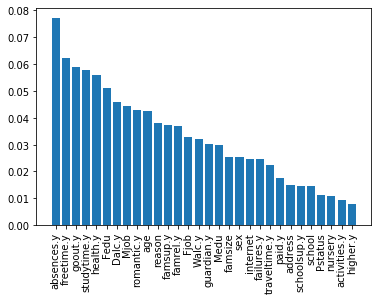

In [30]:
imp_dict={}
dtc.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = dtc.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        14
           2       0.40      0.42      0.41        98
           3       0.14      0.08      0.11        36
           4       0.20      0.24      0.22        58

    accuracy                           0.26       221
   macro avg       0.15      0.15      0.15       221
weighted avg       0.25      0.26      0.26       221

Kappa Score: -0.07271969268336265
	
Feature Medu and its importance is 0.07725194125906501
Feature goout.y and its importance is 0.06453752124488148
Feature freetime.y and its importance is 0.06268583070272185
Feature absences.y and its importance is 0.060309963735711486
Feature health.y and its importance is 0.06009317794575396
Feature reason and its importance is 0.056047930465339575
Feature Walc.y and its importance is 0.05544579388714961
Feature Mjob and its importance is 0.047970314044457056
Feature F

([<matplotlib.axis.XTick at 0x7fed039ebb50>,
 <a list of 30 Text xticklabel objects>)

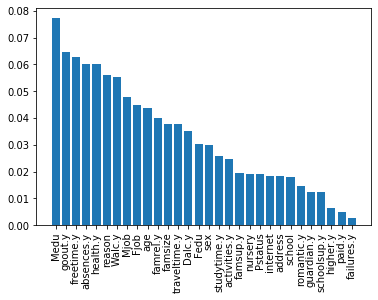

In [31]:
imp_dict={}
dtc.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = dtc.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

### Random Forest

In [32]:
rf = RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.10      1.00      0.18         1
           1       0.07      1.00      0.13         1
           2       0.99      0.61      0.76       166
           3       0.36      0.72      0.48        18
           4       0.57      0.94      0.71        35

    accuracy                           0.68       221
   macro avg       0.42      0.86      0.45       221
weighted avg       0.86      0.68      0.72       221

Kappa Score: 0.4596949140869805
	
Feature failures.x and its importance is 0.1299472895104952
Feature schoolsup.x and its importance is 0.07461821729372424
Feature absences.x and its importance is 0.05953735229750807
Feature goout.x and its importance is 0.04499931348529687
Feature Walc.x and its importance is 0.04422685789510081
Feature Mjob and its importance is 0.04412040886671454
Feature Fedu and its importance is 0.04359584467539045
Feature age and its importance is 0.043415389532873154
Feature health

([<matplotlib.axis.XTick at 0x7fed03bbb050>,
 <a list of 30 Text xticklabel objects>)

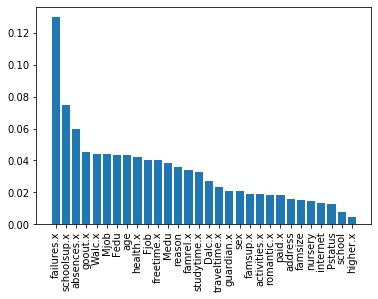

In [33]:
imp_dict={}
rf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= rf.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.17      1.00      0.29         2
           1       0.00      0.00      0.00         0
           2       0.99      0.60      0.75       167
           3       0.00      0.00      0.00         0
           4       0.66      0.90      0.76        52

    accuracy                           0.68       221
   macro avg       0.36      0.50      0.36       221
weighted avg       0.91      0.68      0.75       221

Kappa Score: 0.4414225196682211
	
Feature failures.x and its importance is 0.12660261221483263
Feature schoolsup.x and its importance is 0.07866542497984734
Feature absences.x and its importance is 0.06410212253179957
Feature Walc.x and its importance is 0.0433283849724418
Feature Mjob and its importance is 0.04309850005130002
Feature goout.x and its importance is 0.04298552057006636
Feature age and its importance is 0.04226515798268701
Feature Medu and its importance is 0.04203414315620207
Feature Fedu an

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


([<matplotlib.axis.XTick at 0x7fed03d15210>,
 <a list of 30 Text xticklabel objects>)

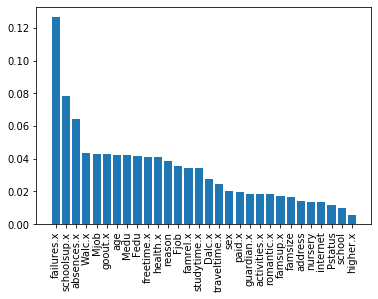

In [34]:
imp_dict={}
rf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= rf.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.94      0.49      0.65       196
           3       0.00      0.00      0.00         4
           4       0.14      0.38      0.20        21

    accuracy                           0.48       221
   macro avg       0.22      0.18      0.17       221
weighted avg       0.85      0.48      0.59       221

Kappa Score: 0.06064270272250927
	
Feature absences.y and its importance is 0.06593293142509621
Feature age and its importance is 0.05417795056183836
Feature health.y and its importance is 0.053202316678112774
Feature goout.y and its importance is 0.05319792597407449
Feature Mjob and its importance is 0.05287829774328916
Feature Walc.y and its importance is 0.05237232882671661
Feature freetime.y and its importance is 0.05202220791546972
Feature Medu and its importance is 0.05074214189685246
Feature Fedu an

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


([<matplotlib.axis.XTick at 0x7fed01e9fc10>,
 <a list of 30 Text xticklabel objects>)

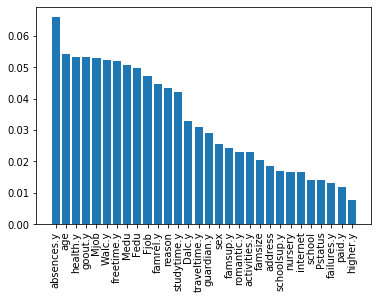

In [35]:
imp_dict={}
rf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = rf.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.88      0.49      0.63       185
           3       0.00      0.00      0.00         0
           4       0.24      0.49      0.32        35

    accuracy                           0.48       221
   macro avg       0.22      0.19      0.19       221
weighted avg       0.78      0.48      0.58       221

Kappa Score: 0.08288740853991483
	
Feature absences.y and its importance is 0.062825111141852
Feature age and its importance is 0.05618697965879943
Feature goout.y and its importance is 0.05535406043075989
Feature health.y and its importance is 0.05482291468295855
Feature Mjob and its importance is 0.05388798470094896
Feature Fedu and its importance is 0.05192382560329723
Feature freetime.y and its importance is 0.051390545127451275
Feature Walc.y and its importance is 0.051051574287739966
Feature Medu and

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


([<matplotlib.axis.XTick at 0x7fed04a25350>,
 <a list of 30 Text xticklabel objects>)

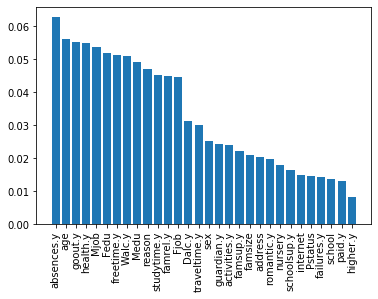

In [36]:
imp_dict={}
rf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = rf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

### Linear SVM

In [37]:
lsvm = LinearSVC(max_iter=1000000)

In [38]:
lsvm.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lsvm.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.99      0.60      0.75       170
           3       0.31      0.69      0.42        16
           4       0.55      0.91      0.69        35

    accuracy                           0.66       221
   macro avg       0.37      0.44      0.37       221
weighted avg       0.87      0.66      0.71       221

Kappa Score: 0.41528285465622294


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
lsvm.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lsvm.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.99      0.59      0.74       170
           3       0.00      0.00      0.00         0
           4       0.65      0.90      0.75        51

    accuracy                           0.67       221
   macro avg       0.33      0.30      0.30       221
weighted avg       0.91      0.67      0.75       221

Kappa Score: 0.4134146341463415


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
lsvm.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lsvm.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.92      0.47      0.63       200
           3       0.00      0.00      0.00         3
           4       0.10      0.33      0.16        18

    accuracy                           0.46       221
   macro avg       0.21      0.16      0.16       221
weighted avg       0.84      0.46      0.58       221

Kappa Score: 0.02100483591125535


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
lsvm.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lsvm.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.90      0.49      0.63       189
           3       0.00      0.00      0.00         0
           4       0.27      0.59      0.37        32

    accuracy                           0.50       221
   macro avg       0.23      0.22      0.20       221
weighted avg       0.81      0.50      0.59       221

Kappa Score: 0.10923014913341378


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [42]:
lg = LogisticRegression(random_state=0,max_iter=1000000)

In [43]:
lg.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lg.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.97      0.60      0.74       168
           3       0.19      0.54      0.29        13
           4       0.53      0.82      0.65        38

    accuracy                           0.62       221
   macro avg       0.34      0.39      0.33       221
weighted avg       0.84      0.62      0.69       221

Kappa Score: 0.3639074799736449


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
lg.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lg.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.99      0.60      0.75       169
           3       0.00      0.00      0.00         0
           4       0.65      0.90      0.75        51

    accuracy                           0.67       221
   macro avg       0.33      0.30      0.30       221
weighted avg       0.91      0.67      0.74       221

Kappa Score: 0.4152393892802231


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
lg.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lg.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.89      0.47      0.62       194
           3       0.00      0.00      0.00         3
           4       0.09      0.23      0.13        22

    accuracy                           0.44       221
   macro avg       0.20      0.14      0.15       221
weighted avg       0.79      0.44      0.56       221

Kappa Score: 0.0017121416341845386


In [46]:
lg.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lg.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         5
           2       0.84      0.48      0.61       181
           3       0.00      0.00      0.00         0
           4       0.25      0.51      0.34        35

    accuracy                           0.47       221
   macro avg       0.22      0.20      0.19       221
weighted avg       0.73      0.47      0.55       221

Kappa Score: 0.07052733743125195


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gradient Boosting

In [47]:
gb = GradientBoostingClassifier(random_state=0)

In [48]:
gb.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= gb.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.29      0.50      0.36         8
           2       0.91      0.63      0.74       150
           3       0.31      0.55      0.39        20
           4       0.57      0.82      0.67        40

    accuracy                           0.64       221
   macro avg       0.41      0.50      0.43       221
weighted avg       0.76      0.64      0.67       221

Kappa Score: 0.422059651097355


In [49]:
gb.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= gb.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.17      0.50      0.25         4
           1       0.00      0.00      0.00         7
           2       0.92      0.59      0.72       158
           3       0.14      0.60      0.23         5
           4       0.59      0.89      0.71        47

    accuracy                           0.64       221
   macro avg       0.36      0.52      0.38       221
weighted avg       0.79      0.64      0.68       221

Kappa Score: 0.393065568142808


In [50]:
gb.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = gb.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.77      0.47      0.58       168
           3       0.03      0.08      0.04        13
           4       0.17      0.29      0.22        34

    accuracy                           0.41       221
   macro avg       0.19      0.17      0.17       221
weighted avg       0.61      0.41      0.48       221

Kappa Score: 0.002274528724540814


In [51]:
gb.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = gb.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         7
           2       0.80      0.52      0.63       159
           3       0.05      0.25      0.08         4
           4       0.32      0.50      0.39        46

    accuracy                           0.48       221
   macro avg       0.24      0.25      0.22       221
weighted avg       0.65      0.48      0.54       221

Kappa Score: 0.12687233750171778
